# Image augmentation

In [5]:
#pip install tensorflow

In [6]:
from tensorflow.keras.utils import img_to_array,load_img
#Using Keras API to conduct the process of image augmentation
#The augmentation process is conducted separately for the TS(positive) and TC(negative) samples
from keras.preprocessing.image import ImageDataGenerator
import glob



In [7]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Setting the initial parameters for the image augmentation process
augmenter = ImageDataGenerator(
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')

imgCount = 5  # The selected number of images to be augmented for every image file

# Create directories if they don't exist
os.makedirs('Augmented/TC', exist_ok=True)
os.makedirs('Augmented/TS', exist_ok=True)

# Augmenting TC images
print("Augmenting TC Samples:")
for file in os.listdir('TCImages'):
    if file.endswith('.png'):
        print("Current File:", file)
        img = load_img(os.path.join('TCImages', file))
        img = img_to_array(img)
        img = img.reshape((1,) + img.shape)

        i = 0
        for batch in augmenter.flow(img, batch_size=1, save_to_dir='Augmented/TC',
                                    save_prefix='TC_Aug', save_format='png'):
            i += 1
            if i == imgCount:
                break

# Augmenting TS images
print("Augmenting TS Samples:")
for file in os.listdir('TSImages'):
    if file.endswith('.png'):
        print("Current File:", file)
        img = load_img(os.path.join('TSImages', file))
        img = img_to_array(img)
        img = img.reshape((1,) + img.shape)

        i = 0
        for batch in augmenter.flow(img, batch_size=1, save_to_dir='Augmented/TS',
                                    save_prefix='TS_Aug', save_format='png'):
            i += 1
            if i == imgCount:
                break


Augmenting TC Samples:
Current File: TC291_40.png
Current File: TC248_53.png
Current File: TC045_40.png
Current File: TC051_35.png
Current File: TC270_57.png
Current File: TC122_30.png
Current File: TC138_40.png
Current File: TC063_50.png
Current File: TC090_47.png
Current File: TC030_30.png
Current File: TC244_53.png
Current File: TC162_39.png
Current File: TC278_32.png
Current File: TC116_35.png
Current File: TC175_35.png
Current File: TC229_57.png
Current File: TC266_32.png
Current File: TC227_52.png
Current File: TC001_39.png
Current File: TC177_30.png
Current File: TC326_38.png
Current File: TC032_36.png
Current File: TC167_37.png
Current File: TC004_37.png
Current File: TC203_51.png
Current File: TC299_33.png
Current File: TC293_46.png
Current File: TC311_45.png
Current File: TC024_52.png
Current File: TC343_58.png
Current File: TC143_37.png
Current File: TC199_49.png
Current File: TC006_33.png
Current File: TC351_58.png
Current File: TC104_36.png
Current File: TC169_33.png
Curre

Current File: TC148_30.png
Current File: TC146_35.png
Current File: TC300_33.png
Current File: TC298_40.png
Current File: TC056_30.png
Current File: TC304_57.png
Current File: TC286_40.png
Current File: TC140_40.png
Current File: TC087_47.png
Current File: TC071_48.png
Current File: TC243_57.png
Current File: TC189_43.png
Current File: TC108_39.png
Current File: TC154_34.png
Current File: TC275_56.png
Current File: TC251_57.png
Current File: TC125_34.png
Current File: TC019_54.png
Current File: TC263_32.png
Current File: TC277_53.png
Current File: TC058_34.png
Current File: TC195_52.png
Current File: TC035_31.png
Current File: TC232_57.png
Augmenting TS Samples:
Current File: TS219_04.png
Current File: TS210_08.png
Current File: TS014_17.png
Current File: TS069_17.png
Current File: TS011_27.png
Current File: TS075_07.png
Current File: TS083_20.png
Current File: TS165_02.png
Current File: TS194_04.png
Current File: TS198_10.png
Current File: TS079_13.png
Current File: TS104_13.png
Curre

# Image preprocessing

In [8]:
#The preprocessing performed on the raw image dataset
# The preprocessing included : Resizing, converting to grayscale, and PCA transformation
#Note: The PCA transformation was exclude from the  CNN model
import numpy as np
from scipy import misc
import glob


TCClass = 0.0
TSClass = 1.0
imgDimension = 100



In [9]:
import numpy as np
from skimage import io, transform
import glob
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

TCClass = 0.0
TSClass = 1.0
imgDimension = 100

f_handle = open('D:\\ASDDataset_Augmented.csv', 'a')  # The CSV file where data records are appended to

# Formatting the header row of the CSV file
headerRow = ""
for i in range(0, (imgDimension * imgDimension)):
    headerRow = headerRow + "Pixel" + str(i) + ","
headerRow = headerRow + "Label" + "\n"
f_handle.write(headerRow)


# Processing the TC images
print("Processing TC images...")
for file in glob.iglob('Augmented/TC/*.png'):
    print("Current File:", file)
    img = io.imread(file)
    img = img[:, :, :3]  # Excluding the Alpha channel
    img = transform.resize(img, output_shape=(imgDimension, imgDimension))  # Resizing images

    img = (img / 255.0)
    img = img.reshape(-1, 3)

    red = img[:, 0]
    green = img[:, 1]
    blue = img[:, 2]
    gray = 0.299 * red + 0.587 * green + 0.114 * blue  # Converting into grayscale
    gray = np.append(gray, TCClass)
    gray = gray.reshape(1, (imgDimension * imgDimension) + 1)
    np.savetxt(f_handle, gray, fmt='%.4g', delimiter=",")

print("TC Done.")

# Same process for TS images
for file in glob.iglob('Augmented/TS/*.png'):
    print("Current File:", file)
    img = io.imread(file)
    img = img[:, :, :3]  # Excluding the Alpha channel
    img = transform.resize(img, output_shape=(imgDimension, imgDimension))  # Resizing images

    img = (img / 255.0)
    img = img.reshape(-1, 3)
    red = img[:, 0]
    green = img[:, 1]
    blue = img[:, 2]
    gray = 0.299 * red + 0.587 * green + 0.114 * blue
    gray = np.append(gray, TSClass)
    gray = gray.reshape(1, (imgDimension * imgDimension) + 1)

    np.savetxt(f_handle, gray, fmt='%.4g', delimiter=",")
f_handle.close()

# Load data from the CSV file
my_data = np.genfromtxt('D:\\ASDDataset_Augmented.csv', delimiter=',')
X = my_data[1:, 0:10000]
labels = my_data[1:, 10000].astype(dtype='int')

# Preprocess data to handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

nDim = 50
pca = PCA(n_components=nDim)
X_transformed = pca.fit_transform(X)


Processing TC images...
Current File: Augmented/TC/TC_Aug_0_9105.png
Current File: Augmented/TC/TC_Aug_0_2050.png
Current File: Augmented/TC/TC_Aug_0_5059.png
Current File: Augmented/TC/TC_Aug_0_6550.png
Current File: Augmented/TC/TC_Aug_0_6544.png
Current File: Augmented/TC/TC_Aug_0_373.png
Current File: Augmented/TC/TC_Aug_0_4435.png
Current File: Augmented/TC/TC_Aug_0_9111.png
Current File: Augmented/TC/TC_Aug_0_8227.png
Current File: Augmented/TC/TC_Aug_0_1565.png
Current File: Augmented/TC/TC_Aug_0_3400.png
Current File: Augmented/TC/TC_Aug_0_5071.png
Current File: Augmented/TC/TC_Aug_0_6578.png
Current File: Augmented/TC/TC_Aug_0_1217.png
Current File: Augmented/TC/TC_Aug_0_7666.png
Current File: Augmented/TC/TC_Aug_0_8233.png
Current File: Augmented/TC/TC_Aug_0_3366.png
Current File: Augmented/TC/TC_Aug_0_429.png
Current File: Augmented/TC/TC_Aug_0_7855.png
Current File: Augmented/TC/TC_Aug_0_7699.png
Current File: Augmented/TC/TC_Aug_0_5918.png
Current File: Augmented/TC/TC_Aug

Current File: Augmented/TC/TC_Aug_0_4024.png
Current File: Augmented/TC/TC_Aug_0_9514.png
Current File: Augmented/TC/TC_Aug_0_9272.png
Current File: Augmented/TC/TC_Aug_0_776.png
Current File: Augmented/TC/TC_Aug_0_4756.png
Current File: Augmented/TC/TC_Aug_0_2327.png
Current File: Augmented/TC/TC_Aug_0_831.png
Current File: Augmented/TC/TC_Aug_0_3818.png
Current File: Augmented/TC/TC_Aug_0_8781.png
Current File: Augmented/TC/TC_Aug_0_4805.png
Current File: Augmented/TC/TC_Aug_0_2284.png
Current File: Augmented/TC/TC_Aug_0_3824.png
Current File: Augmented/TC/TC_Aug_0_6784.png
Current File: Augmented/TC/TC_Aug_0_6948.png
Current File: Augmented/TC/TC_Aug_0_8965.png
Current File: Augmented/TC/TC_Aug_0_819.png
Current File: Augmented/TC/TC_Aug_0_3165.png
Current File: Augmented/TC/TC_Aug_0_5272.png
Current File: Augmented/TC/TC_Aug_0_1014.png
Current File: Augmented/TC/TC_Aug_0_7465.png
Current File: Augmented/TC/TC_Aug_0_7471.png
Current File: Augmented/TC/TC_Aug_0_158.png
Current File: 

Current File: Augmented/TC/TC_Aug_0_3563.png
Current File: Augmented/TC/TC_Aug_0_7063.png
Current File: Augmented/TC/TC_Aug_0_7088.png
Current File: Augmented/TC/TC_Aug_0_80.png
Current File: Augmented/TC/TC_Aug_0_2696.png
Current File: Augmented/TC/TC_Aug_0_5853.png
Current File: Augmented/TC/TC_Aug_0_9927.png
Current File: Augmented/TC/TC_Aug_0_2866.png
Current File: Augmented/TC/TC_Aug_0_9932.png
Current File: Augmented/TC/TC_Aug_0_2867.png
Current File: Augmented/TC/TC_Aug_0_588.png
Current File: Augmented/TC/TC_Aug_0_2873.png
Current File: Augmented/TC/TC_Aug_0_9926.png
Current File: Augmented/TC/TC_Aug_0_6383.png
Current File: Augmented/TC/TC_Aug_0_7937.png
Current File: Augmented/TC/TC_Aug_0_3562.png
Current File: Augmented/TC/TC_Aug_0_9729.png
Current File: Augmented/TC/TC_Aug_0_7704.png
Current File: Augmented/TC/TC_Aug_0_8351.png
Current File: Augmented/TC/TC_Aug_0_3204.png
Current File: Augmented/TC/TC_Aug_0_5661.png
Current File: Augmented/TC/TC_Aug_0_7076.png
Current File:

Current File: Augmented/TC/TC_Aug_0_9513.png
Current File: Augmented/TC/TC_Aug_0_3758.png
Current File: Augmented/TC/TC_Aug_0_5329.png
Current File: Augmented/TC/TC_Aug_0_2446.png
Current File: Augmented/TC/TC_Aug_0_771.png
Current File: Augmented/TC/TC_Aug_0_4751.png
Current File: Augmented/TC/TC_Aug_0_6146.png
Current File: Augmented/TC/TC_Aug_0_8180.png
Current File: Augmented/TC/TC_Aug_0_942.png
Current File: Augmented/TC/TC_Aug_0_956.png
Current File: Augmented/TC/TC_Aug_0_5498.png
Current File: Augmented/TC/TC_Aug_0_6191.png
Current File: Augmented/TC/TC_Aug_0_1826.png
Current File: Augmented/TC/TC_Aug_0_3943.png
Current File: Augmented/TC/TC_Aug_0_6185.png
Current File: Augmented/TC/TC_Aug_0_3572.png
Current File: Augmented/TC/TC_Aug_0_1365.png
Current File: Augmented/TC/TC_Aug_0_8341.png
Current File: Augmented/TC/TC_Aug_0_3214.png
Current File: Augmented/TC/TC_Aug_0_8433.png
Current File: Augmented/TC/TC_Aug_0_1371.png
Current File: Augmented/TC/TC_Aug_0_229.png
Current File: 

Current File: Augmented/TC/TC_Aug_0_3405.png
Current File: Augmented/TC/TC_Aug_0_1212.png
Current File: Augmented/TC/TC_Aug_0_7663.png
Current File: Augmented/TC/TC_Aug_0_9896.png
Current File: Augmented/TC/TC_Aug_0_362.png
Current File: Augmented/TC/TC_Aug_0_4342.png
Current File: Augmented/TC/TC_Aug_0_6555.png
Current File: Augmented/TC/TC_Aug_0_2055.png
Current File: Augmented/TC/TC_Aug_0_7139.png
Current File: Augmented/TC/TC_Aug_0_6227.png
Current File: Augmented/TC/TC_Aug_0_1548.png
Current File: Augmented/TC/TC_Aug_0_9672.png
Current File: Augmented/TC/TC_Aug_0_8587.png
Current File: Augmented/TC/TC_Aug_0_7878.png
Current File: Augmented/TC/TC_Aug_0_2900.png
Current File: Augmented/TC/TC_Aug_0_7850.png
Current File: Augmented/TC/TC_Aug_0_6596.png
Current File: Augmented/TC/TC_Aug_0_5935.png
Current File: Augmented/TC/TC_Aug_0_2082.png
Current File: Augmented/TC/TC_Aug_0_4395.png
Current File: Augmented/TC/TC_Aug_0_7313.png
Current File: Augmented/TC/TC_Aug_0_5262.png
Current Fil

Current File: Augmented/TC/TC_Aug_0_5511.png
Current File: Augmented/TC/TC_Aug_0_8021.png
Current File: Augmented/TC/TC_Aug_0_1763.png
Current File: Augmented/TC/TC_Aug_0_1005.png
Current File: Augmented/TC/TC_Aug_0_7474.png
Current File: Augmented/TC/TC_Aug_0_2083.png
Current File: Augmented/TC/TC_Aug_0_6583.png
Current File: Augmented/TC/TC_Aug_0_4380.png
Current File: Augmented/TC/TC_Aug_0_2929.png
Current File: Augmented/TC/TC_Aug_0_8592.png
Current File: Augmented/TC/TC_Aug_0_2915.png
Current File: Augmented/TC/TC_Aug_0_6226.png
Current File: Augmented/TC/TC_Aug_0_411.png
Current File: Augmented/TC/TC_Aug_0_2726.png
Current File: Augmented/TC/TC_Aug_0_4357.png
Current File: Augmented/TC/TC_Aug_0_8579.png
Current File: Augmented/TC/TC_Aug_0_3362.png
Current File: Augmented/TC/TC_Aug_0_9897.png
Current File: Augmented/TC/TC_Aug_0_8551.png
Current File: Augmented/TC/TC_Aug_0_1213.png
Current File: Augmented/TC/TC_Aug_0_5075.png
Current File: Augmented/TC/TC_Aug_0_5061.png
Current Fil

Current File: Augmented/TC/TC_Aug_0_7599.png
Current File: Augmented/TC/TC_Aug_0_7572.png
Current File: Augmented/TC/TC_Aug_0_5365.png
Current File: Augmented/TC/TC_Aug_0_5403.png
Current File: Augmented/TC/TC_Aug_0_7214.png
Current File: Augmented/TC/TC_Aug_0_8127.png
Current File: Augmented/TC/TC_Aug_0_7200.png
Current File: Augmented/TC/TC_Aug_0_729.png
Current File: Augmented/TC/TC_Aug_0_4709.png
Current File: Augmented/TC/TC_Aug_0_6678.png
Current File: Augmented/TC/TC_Aug_0_6888.png
Current File: Augmented/TC/TC_Aug_0_9563.png
Current File: Augmented/TC/TC_Aug_0_6650.png
Current File: Augmented/TC/TC_Aug_0_701.png
Current File: Augmented/TC/TC_Aug_0_715.png
Current File: Augmented/TC/TC_Aug_0_9577.png
Current File: Augmented/TC/TC_Aug_0_2581.png
Current File: Augmented/TC/TC_Aug_0_3847.png
Current File: Augmented/TC/TC_Aug_0_5588.png
Current File: Augmented/TC/TC_Aug_0_6095.png
Current File: Augmented/TC/TC_Aug_0_1922.png
Current File: Augmented/TC/TC_Aug_0_3853.png
Current File:

Current File: Augmented/TC/TC_Aug_0_9011.png
Current File: Augmented/TC/TC_Aug_0_8469.png
Current File: Augmented/TC/TC_Aug_0_9777.png
Current File: Augmented/TC/TC_Aug_0_8441.png
Current File: Augmented/TC/TC_Aug_0_5165.png
Current File: Augmented/TC/TC_Aug_0_3514.png
Current File: Augmented/TC/TC_Aug_0_5603.png
Current File: Augmented/TC/TC_Aug_0_9039.png
Current File: Augmented/TC/TC_Aug_0_7014.png
Current File: Augmented/TC/TC_Aug_0_8333.png
Current File: Augmented/TC/TC_Aug_0_7000.png
Current File: Augmented/TC/TC_Aug_0_529.png
Current File: Augmented/TC/TC_Aug_0_5617.png
Current File: Augmented/TC/TC_Aug_0_5171.png
Current File: Augmented/TC/TC_Aug_0_1317.png
Current File: Augmented/TC/TC_Aug_0_6478.png
Current File: Augmented/TC/TC_Aug_0_7955.png
Current File: Augmented/TC/TC_Aug_0_6493.png
Current File: Augmented/TC/TC_Aug_0_5824.png
Current File: Augmented/TC/TC_Aug_0_2839.png
Current File: Augmented/TC/TC_Aug_0_7799.png
Current File: Augmented/TC/TC_Aug_0_2811.png
Current Fil

Current File: Augmented/TC/TC_Aug_0_3673.png
Current File: Augmented/TC/TC_Aug_0_6723.png
Current File: Augmented/TC/TC_Aug_0_3883.png
Current File: Augmented/TC/TC_Aug_0_114.png
Current File: Augmented/TC/TC_Aug_0_9376.png
Current File: Augmented/TC/TC_Aug_0_6045.png
Current File: Augmented/TC/TC_Aug_0_9362.png
Current File: Augmented/TC/TC_Aug_0_6051.png
Current File: Augmented/TC/TC_Aug_0_3129.png
Current File: Augmented/TC/TC_Aug_0_5558.png
Current File: Augmented/TC/TC_Aug_0_4120.png
Current File: Augmented/TC/TC_Aug_0_7429.png
Current File: Augmented/TC/TC_Aug_0_1058.png
Current File: Augmented/TC/TC_Aug_0_6904.png
Current File: Augmented/TC/TC_Aug_0_4875.png
Current File: Augmented/TC/TC_Aug_0_9389.png
Current File: Augmented/TC/TC_Aug_0_8083.png
Current File: Augmented/TC/TC_Aug_0_6910.png
Current File: Augmented/TC/TC_Aug_0_8915.png
Current File: Augmented/TC/TC_Aug_0_7398.png
Current File: Augmented/TC/TC_Aug_0_6086.png
Current File: Augmented/TC/TC_Aug_0_869.png
Current File

Current File: Augmented/TC/TC_Aug_0_6285.png
Current File: Augmented/TC/TC_Aug_0_5954.png
Current File: Augmented/TC/TC_Aug_0_9820.png
Current File: Augmented/TC/TC_Aug_0_8280.png
Current File: Augmented/TC/TC_Aug_0_9834.png
Current File: Augmented/TC/TC_Aug_0_2961.png
Current File: Augmented/TC/TC_Aug_0_2752.png
Current File: Augmented/TC/TC_Aug_0_9607.png
Current File: Augmented/TC/TC_Aug_0_6534.png
Current File: Augmented/TC/TC_Aug_0_4445.png
Current File: Augmented/TC/TC_Aug_0_465.png
Current File: Augmented/TC/TC_Aug_0_4451.png
Current File: Augmented/TC/TC_Aug_0_6246.png
Current File: Augmented/TC/TC_Aug_0_9613.png
Current File: Augmented/TC/TC_Aug_0_5029.png
Current File: Augmented/TC/TC_Aug_0_4337.png
Current File: Augmented/TC/TC_Aug_0_317.png
Current File: Augmented/TC/TC_Aug_0_3458.png
Current File: Augmented/TC/TC_Aug_0_459.png
Current File: Augmented/TC/TC_Aug_0_2008.png
Current File: Augmented/TC/TC_Aug_0_1501.png
Current File: Augmented/TC/TC_Aug_0_7170.png
Current File:

Current File: Augmented/TC/TC_Aug_0_6669.png
Current File: Augmented/TC/TC_Aug_0_5374.png
Current File: Augmented/TC/TC_Aug_0_3705.png
Current File: Augmented/TC/TC_Aug_0_8650.png
Current File: Augmented/TC/TC_Aug_0_8888.png
Current File: Augmented/TC/TC_Aug_0_1674.png
Current File: Augmented/TC/TC_Aug_0_3063.png
Current File: Augmented/TC/TC_Aug_0_4693.png
Current File: Augmented/TC/TC_Aug_0_1933.png
Current File: Augmented/TC/TC_Aug_0_2584.png
Current File: Augmented/TC/TC_Aug_0_2590.png
Current File: Augmented/TC/TC_Aug_0_6090.png
Current File: Augmented/TC/TC_Aug_0_843.png
Current File: Augmented/TC/TC_Aug_0_4863.png
Current File: Augmented/TC/TC_Aug_0_1728.png
Current File: Augmented/TC/TC_Aug_0_4888.png
Current File: Augmented/TC/TC_Aug_0_2221.png
Current File: Augmented/TC/TC_Aug_0_4650.png
Current File: Augmented/TC/TC_Aug_0_3659.png
Current File: Augmented/TC/TC_Aug_0_9406.png
Current File: Augmented/TC/TC_Aug_0_102.png
Current File: Augmented/TC/TC_Aug_0_3895.png
Current File

Current File: Augmented/TC/TC_Aug_0_2198.png
Current File: Augmented/TC/TC_Aug_0_1491.png
Current File: Augmented/TC/TC_Aug_0_9783.png
Current File: Augmented/TC/TC_Aug_0_7976.png
Current File: Augmented/TC/TC_Aug_0_8489.png
Current File: Augmented/TC/TC_Aug_0_9797.png
Current File: Augmented/TC/TC_Aug_0_7962.png
Current File: Augmented/TC/TC_Aug_0_5813.png
Current File: Augmented/TC/TC_Aug_0_1446.png
Current File: Augmented/TC/TC_Aug_0_1320.png
Current File: Augmented/TC/TC_Aug_0_7751.png
Current File: Augmented/TC/TC_Aug_0_278.png
Current File: Augmented/TC/TC_Aug_0_3523.png
Current File: Augmented/TC/TC_Aug_0_9768.png
Current File: Augmented/TC/TC_Aug_0_1334.png
Current File: Augmented/TC/TC_Aug_0_8476.png
Current File: Augmented/TC/TC_Aug_0_7745.png
Current File: Augmented/TC/TC_Aug_0_3245.png
Current File: Augmented/TC/TC_Aug_0_9026.png
Current File: Augmented/TC/TC_Aug_0_522.png
Current File: Augmented/TC/TC_Aug_0_244.png
Current File: Augmented/TC/TC_Aug_0_4264.png
Current File:

Current File: Augmented/TC/TC_Aug_0_6129.png
Current File: Augmented/TC/TC_Aug_0_6897.png
Current File: Augmented/TC/TC_Aug_0_7551.png
Current File: Augmented/TC/TC_Aug_0_3737.png
Current File: Augmented/TC/TC_Aug_0_2429.png
Current File: Augmented/TC/TC_Aug_0_6883.png
Current File: Augmented/TC/TC_Aug_0_7545.png
Current File: Augmented/TC/TC_Aug_0_7223.png
Current File: Augmented/TC/TC_Aug_0_8110.png
Current File: Augmented/TC/TC_Aug_0_4919.png
Current File: Augmented/TC/TC_Aug_0_1861.png
Current File: Augmented/TC/TC_Aug_0_9597.png
Current File: Augmented/TC/TC_Aug_0_8851.png
Current File: Augmented/TC/TC_Aug_0_5385.png
Current File: Augmented/TC/TC_Aug_0_3938.png
Current File: Augmented/TC/TC_Aug_0_5391.png
Current File: Augmented/TC/TC_Aug_0_3086.png
Current File: Augmented/TC/TC_Aug_0_911.png
Current File: Augmented/TC/TC_Aug_0_2398.png
Current File: Augmented/TC/TC_Aug_0_1691.png
Current File: Augmented/TC/TC_Aug_0_4266.png
Current File: Augmented/TC/TC_Aug_0_4500.png
Current Fil

Current File: Augmented/TC/TC_Aug_0_7839.png
Current File: Augmented/TC/TC_Aug_0_2799.png
Current File: Augmented/TC/TC_Aug_0_3493.png
Current File: Augmented/TC/TC_Aug_0_2955.png
Current File: Augmented/TC/TC_Aug_0_8288.png
Current File: Augmented/TC/TC_Aug_0_492.png
Current File: Augmented/TC/TC_Aug_0_5974.png
Current File: Augmented/TC/TC_Aug_0_9828.png
Current File: Augmented/TC/TC_Aug_0_2969.png
Current File: Augmented/TC/TC_Aug_0_486.png
Current File: Augmented/TC/TC_Aug_0_1051.png
Current File: Augmented/TC/TC_Aug_0_5237.png
Current File: Augmented/TC/TC_Aug_0_4129.png
Current File: Augmented/TC/TC_Aug_0_3120.png
Current File: Augmented/TC/TC_Aug_0_6058.png
Current File: Augmented/TC/TC_Aug_0_8075.png
Current File: Augmented/TC/TC_Aug_0_5223.png
Current File: Augmented/TC/TC_Aug_0_3652.png
Current File: Augmented/TC/TC_Aug_0_8707.png
Current File: Augmented/TC/TC_Aug_0_9419.png
Current File: Augmented/TC/TC_Aug_0_1045.png
Current File: Augmented/TC/TC_Aug_0_4115.png
Current File

Current File: Augmented/TC/TC_Aug_0_3647.png
Current File: Augmented/TC/TC_Aug_0_4128.png
Current File: Augmented/TC/TC_Aug_0_7421.png
Current File: Augmented/TC/TC_Aug_0_8074.png
Current File: Augmented/TC/TC_Aug_0_6059.png
Current File: Augmented/TC/TC_Aug_0_1736.png
Current File: Augmented/TC/TC_Aug_0_7810.png
Current File: Augmented/TC/TC_Aug_0_493.png
Current File: Augmented/TC/TC_Aug_0_7804.png
Current File: Augmented/TC/TC_Aug_0_9829.png
Current File: Augmented/TC/TC_Aug_0_2954.png
Current File: Augmented/TC/TC_Aug_0_3492.png
Current File: Augmented/TC/TC_Aug_0_7192.png
Current File: Augmented/TC/TC_Aug_0_7186.png
Current File: Augmented/TC/TC_Aug_0_6298.png
Current File: Augmented/TC/TC_Aug_0_3486.png
Current File: Augmented/TC/TC_Aug_0_1291.png
Current File: Augmented/TC/TC_Aug_0_8538.png
Current File: Augmented/TC/TC_Aug_0_2773.png
Current File: Augmented/TC/TC_Aug_0_4302.png
Current File: Augmented/TC/TC_Aug_0_4464.png
Current File: Augmented/TC/TC_Aug_0_6267.png
Current Fil

Current File: Augmented/TC/TC_Aug_0_3056.png
Current File: Augmented/TC/TC_Aug_0_5427.png
Current File: Augmented/TC/TC_Aug_0_5341.png
Current File: Augmented/TC/TC_Aug_0_6890.png
Current File: Augmented/TC/TC_Aug_0_7556.png
Current File: Augmented/TC/TC_Aug_0_8671.png
Current File: Augmented/TC/TC_Aug_0_1133.png
Current File: Augmented/TC/TC_Aug_0_3042.png
Current File: Augmented/TC/TC_Aug_0_1655.png
Current File: Augmented/TC/TC_Aug_0_7224.png
Current File: Augmented/TC/TC_Aug_0_8117.png
Current File: Augmented/TC/TC_Aug_0_9396.png
Current File: Augmented/TC/TC_Aug_0_1912.png
Current File: Augmented/TC/TC_Aug_0_876.png
Current File: Augmented/TC/TC_Aug_0_5590.png
Current File: Augmented/TC/TC_Aug_0_3687.png
Current File: Augmented/TC/TC_Aug_0_5584.png
Current File: Augmented/TC/TC_Aug_0_4671.png
Current File: Augmented/TC/TC_Aug_0_7378.png
Current File: Augmented/TC/TC_Aug_0_6700.png
Current File: Augmented/TC/TC_Aug_0_137.png
Current File: Augmented/TC/TC_Aug_0_2566.png
Current File

Current File: Augmented/TC/TC_Aug_0_540.png
Current File: Augmented/TC/TC_Aug_0_8372.png
Current File: Augmented/TC/TC_Aug_0_3227.png
Current File: Augmented/TC/TC_Aug_0_2139.png
Current File: Augmented/TC/TC_Aug_0_5130.png
Current File: Augmented/TC/TC_Aug_0_7727.png
Current File: Augmented/TC/TC_Aug_0_6439.png
Current File: Augmented/TC/TC_Aug_0_8400.png
Current File: Augmented/TC/TC_Aug_0_7733.png
Current File: Augmented/TC/TC_Aug_0_5124.png
Current File: Augmented/TC/TC_Aug_0_2893.png
Current File: Augmented/TC/TC_Aug_0_9078.png
Current File: Augmented/TC/TC_Aug_0_1424.png
Current File: Augmented/TC/TC_Aug_0_2878.png
Current File: Augmented/TC/TC_Aug_0_7914.png
Current File: Augmented/TC/TC_Aug_0_5865.png
Current File: Augmented/TC/TC_Aug_0_7082.png
Current File: Augmented/TC/TC_Aug_0_1395.png
Current File: Augmented/TC/TC_Aug_0_9911.png
Current File: Augmented/TC/TC_Aug_0_3596.png
Current File: Augmented/TC/TC_Aug_0_2850.png
Current File: Augmented/TC/TC_Aug_0_1381.png
Current Fil

Current File: Augmented/TC/TC_Aug_0_8985.png
Current File: Augmented/TC/TC_Aug_0_6770.png
Current File: Augmented/TC/TC_Aug_0_9443.png
Current File: Augmented/TC/TC_Aug_0_5251.png
Current File: Augmented/TC/TC_Aug_0_1751.png
Current File: Augmented/TC/TC_Aug_0_1989.png
Current File: Augmented/TC/TC_Aug_0_8013.png
Current File: Augmented/TC/TC_Aug_0_4629.png
Current File: Augmented/TC/TC_Aug_0_3146.png
Current File: Augmented/TC/TC_Aug_0_2258.png
Current File: Augmented/TC/TC_Aug_0_5537.png
Current File: Augmented/TC/TC_Aug_0_9319.png
Current File: Augmented/TC/TC_Aug_0_8007.png
Current File: Augmented/TC/TC_Aug_0_8761.png
Current File: Augmented/TC/TC_Aug_0_5245.png
Current File: Augmented/TC/TC_Aug_0_3634.png
Current File: Augmented/TC/TC_Aug_0_190.png
Current File: Augmented/TC/TC_Aug_0_3807.png
Current File: Augmented/TC/TC_Aug_0_184.png
Current File: Augmented/TC/TC_Aug_0_5292.png
Current File: Augmented/TC/TC_Aug_0_4832.png
Current File: Augmented/TC/TC_Aug_0_812.png
Current File:

Current File: Augmented/TC/TC_Aug_0_5052.png
Current File: Augmented/TC/TC_Aug_0_8576.png
Current File: Augmented/TC/TC_Aug_0_7645.png
Current File: Augmented/TC/TC_Aug_0_1234.png
Current File: Augmented/TC/TC_Aug_0_344.png
Current File: Augmented/TC/TC_Aug_0_9898.png
Current File: Augmented/TC/TC_Aug_0_8238.png
Current File: Augmented/TC/TC_Aug_0_4416.png
Current File: Augmented/TC/TC_Aug_0_3379.png
Current File: Augmented/TC/TC_Aug_0_6201.png
Current File: Augmented/TC/TC_Aug_0_7899.png
Current File: Augmented/TC/TC_Aug_0_1230.png
Current File: Augmented/TC/TC_Aug_0_3427.png
Current File: Augmented/TC/TC_Aug_0_1556.png
Current File: Augmented/TC/TC_Aug_0_1542.png
Current File: Augmented/TC/TC_Aug_0_3355.png
Current File: Augmented/TC/TC_Aug_0_9678.png
Current File: Augmented/TC/TC_Aug_0_4374.png
Current File: Augmented/TC/TC_Aug_0_2705.png
Current File: Augmented/TC/TC_Aug_0_6563.png
Current File: Augmented/TC/TC_Aug_0_8228.png
Current File: Augmented/TC/TC_Aug_0_6205.png
Current Fil

Current File: Augmented/TC/TC_Aug_0_989.png
Current File: Augmented/TC/TC_Aug_0_2300.png
Current File: Augmented/TC/TC_Aug_0_1609.png
Current File: Augmented/TC/TC_Aug_0_6172.png
Current File: Augmented/TC/TC_Aug_0_2472.png
Current File: Augmented/TC/TC_Aug_0_4003.png
Current File: Augmented/TC/TC_Aug_0_9527.png
Current File: Augmented/TC/TC_Aug_0_6614.png
Current File: Augmented/TC/TC_Aug_0_5335.png
Current File: Augmented/TC/TC_Aug_0_3744.png
Current File: Augmented/TC/TC_Aug_0_8611.png
Current File: Augmented/TC/TC_Aug_0_3022.png
Current File: Augmented/TC/TC_Aug_0_5447.png
Current File: Augmented/TC/TC_Aug_0_2328.png
Current File: Augmented/TC/TC_Aug_0_7536.png
Current File: Augmented/TC/TC_Aug_0_8605.png
Current File: Augmented/TC/TC_Aug_0_6628.png
Current File: Augmented/TC/TC_Aug_0_1147.png
Current File: Augmented/TC/TC_Aug_0_5321.png
Current File: Augmented/TC/TC_Aug_0_1972.png
Current File: Augmented/TC/TC_Aug_0_3803.png
Current File: Augmented/TC/TC_Aug_0_7495.png
Current Fil

Current File: Augmented/TC/TC_Aug_0_223.png
Current File: Augmented/TC/TC_Aug_0_6414.png
Current File: Augmented/TC/TC_Aug_0_1390.png
Current File: Augmented/TC/TC_Aug_0_7939.png
Current File: Augmented/TC/TC_Aug_0_3587.png
Current File: Augmented/TC/TC_Aug_0_2699.png
Current File: Augmented/TC/TC_Aug_0_5848.png
Current File: Augmented/TC/TC_Aug_0_5684.png
Current File: Augmented/TC/TC_Aug_0_9900.png
Current File: Augmented/TC/TC_Aug_0_9096.png
Current File: Augmented/TC/TC_Aug_0_7911.png
Current File: Augmented/TC/TC_Aug_0_2869.png
Current File: Augmented/TC/TC_Aug_0_587.png
Current File: Augmented/TC/TC_Aug_0_5861.png
Current File: Augmented/TC/TC_Aug_0_593.png
Current File: Augmented/TC/TC_Aug_0_9097.png
Current File: Augmented/TC/TC_Aug_0_8389.png
Current File: Augmented/TC/TC_Aug_0_1385.png
Current File: Augmented/TC/TC_Aug_0_3592.png
Current File: Augmented/TC/TC_Aug_0_3586.png
Current File: Augmented/TC/TC_Aug_0_2840.png
Current File: Augmented/TC/TC_Aug_0_5849.png
Current File:

Current File: Augmented/TS/TS_Aug_0_5544.png
Current File: Augmented/TS/TS_Aug_0_342.png
Current File: Augmented/TS/TS_Aug_0_1044.png
Current File: Augmented/TS/TS_Aug_0_3653.png
Current File: Augmented/TS/TS_Aug_0_6703.png
Current File: Augmented/TS/TS_Aug_0_9342.png
Current File: Augmented/TS/TS_Aug_0_6071.png
Current File: Augmented/TS/TS_Aug_0_4666.png
Current File: Augmented/TS/TS_Aug_0_3109.png
Current File: Augmented/TS/TS_Aug_0_587.png
Current File: Augmented/TS/TS_Aug_0_1681.png
Current File: Augmented/TS/TS_Aug_0_3082.png
Current File: Augmented/TS/TS_Aug_0_5395.png
Current File: Augmented/TS/TS_Aug_0_7582.png
Current File: Augmented/TS/TS_Aug_0_1871.png
Current File: Augmented/TS/TS_Aug_0_8855.png
Current File: Augmented/TS/TS_Aug_0_3900.png
Current File: Augmented/TS/TS_Aug_0_7555.png
Current File: Augmented/TS/TS_Aug_0_544.png
Current File: Augmented/TS/TS_Aug_0_1124.png
Current File: Augmented/TS/TS_Aug_0_7233.png
Current File: Augmented/TS/TS_Aug_0_236.png
Current File: 

Current File: Augmented/TS/TS_Aug_0_5396.png
Current File: Augmented/TS/TS_Aug_0_6847.png
Current File: Augmented/TS/TS_Aug_0_3081.png
Current File: Augmented/TS/TS_Aug_0_1682.png
Current File: Augmented/TS/TS_Aug_0_5382.png
Current File: Augmented/TS/TS_Aug_0_8842.png
Current File: Augmented/TS/TS_Aug_0_1133.png
Current File: Augmented/TS/TS_Aug_0_3724.png
Current File: Augmented/TS/TS_Aug_0_5433.png
Current File: Augmented/TS/TS_Aug_0_8117.png
Current File: Augmented/TS/TS_Aug_0_221.png
Current File: Augmented/TS/TS_Aug_0_4739.png
Current File: Augmented/TS/TS_Aug_0_5427.png
Current File: Augmented/TS/TS_Aug_0_6890.png
Current File: Augmented/TS/TS_Aug_0_547.png
Current File: Augmented/TS/TS_Aug_0_5369.png
Current File: Augmented/TS/TS_Aug_0_4077.png
Current File: Augmented/TS/TS_Aug_0_8895.png
Current File: Augmented/TS/TS_Aug_0_9235.png
Current File: Augmented/TS/TS_Aug_0_9976.png
Current File: Augmented/TS/TS_Aug_0_7973.png
Current File: Augmented/TS/TS_Aug_0_9786.png
Current File

Current File: Augmented/TS/TS_Aug_0_9797.png
Current File: Augmented/TS/TS_Aug_0_7976.png
Current File: Augmented/TS/TS_Aug_0_9973.png
Current File: Augmented/TS/TS_Aug_0_1491.png
Current File: Augmented/TS/TS_Aug_0_9754.png
Current File: Augmented/TS/TS_Aug_0_6467.png
Current File: Augmented/TS/TS_Aug_0_5608.png
Current File: Augmented/TS/TS_Aug_0_9032.png
Current File: Augmented/TS/TS_Aug_0_2173.png
Current File: Augmented/TS/TS_Aug_0_4502.png
Current File: Augmented/TS/TS_Aug_0_9740.png
Current File: Augmented/TS/TS_Aug_0_9768.png
Current File: Augmented/TS/TS_Aug_0_3245.png
Current File: Augmented/TS/TS_Aug_0_5620.png
Current File: Augmented/TS/TS_Aug_0_1446.png
Current File: Augmented/TS/TS_Aug_0_8462.png
Current File: Augmented/TS/TS_Aug_0_4258.png
Current File: Augmented/TS/TS_Aug_0_2629.png
Current File: Augmented/TS/TS_Aug_0_6328.png
Current File: Augmented/TS/TS_Aug_0_7036.png
Current File: Augmented/TS/TS_Aug_0_4259.png
Current File: Augmented/TS/TS_Aug_0_1321.png
Current Fi

Current File: Augmented/TS/TS_Aug_0_7753.png
Current File: Augmented/TS/TS_Aug_0_1322.png
Current File: Augmented/TS/TS_Aug_0_742.png
Current File: Augmented/TS/TS_Aug_0_8306.png
Current File: Augmented/TS/TS_Aug_0_3253.png
Current File: Augmented/TS/TS_Aug_0_5622.png
Current File: Augmented/TS/TS_Aug_0_9030.png
Current File: Augmented/TS/TS_Aug_0_2603.png
Current File: Augmented/TS/TS_Aug_0_4272.png
Current File: Augmented/TS/TS_Aug_0_6465.png
Current File: Augmented/TS/TS_Aug_0_9742.png
Current File: Augmented/TS/TS_Aug_0_3509.png
Current File: Augmented/TS/TS_Aug_0_6317.png
Current File: Augmented/TS/TS_Aug_0_1478.png
Current File: Augmented/TS/TS_Aug_0_1493.png
Current File: Augmented/TS/TS_Aug_0_7948.png
Current File: Augmented/TS/TS_Aug_0_781.png
Current File: Augmented/TS/TS_Aug_0_7790.png
Current File: Augmented/TS/TS_Aug_0_959.png
Current File: Augmented/TS/TS_Aug_0_7960.png
Current File: Augmented/TS/TS_Aug_0_971.png
Current File: Augmented/TS/TS_Aug_0_9781.png
Current File: 

Current File: Augmented/TS/TS_Aug_0_7053.png
Current File: Augmented/TS/TS_Aug_0_5877.png
Current File: Augmented/TS/TS_Aug_0_7906.png
Current File: Augmented/TS/TS_Aug_0_7912.png
Current File: Augmented/TS/TS_Aug_0_5863.png
Current File: Augmented/TS/TS_Aug_0_9917.png
Current File: Augmented/TS/TS_Aug_0_1387.png
Current File: Augmented/TS/TS_Aug_0_9903.png
Current File: Augmented/TS/TS_Aug_0_3779.png
Current File: Augmented/TS/TS_Aug_0_9254.png
Current File: Augmented/TS/TS_Aug_0_4764.png
Current File: Augmented/TS/TS_Aug_0_9240.png
Current File: Augmented/TS/TS_Aug_0_6173.png
Current File: Augmented/TS/TS_Aug_0_6615.png
Current File: Augmented/TS/TS_Aug_0_8638.png
Current File: Augmented/TS/TS_Aug_0_2473.png
Current File: Augmented/TS/TS_Aug_0_3745.png
Current File: Augmented/TS/TS_Aug_0_9268.png
Current File: Augmented/TS/TS_Aug_0_1634.png
Current File: Augmented/TS/TS_Aug_0_240.png
Current File: Augmented/TS/TS_Aug_0_1620.png
Current File: Augmented/TS/TS_Aug_0_5446.png
Current Fil

Current File: Augmented/TS/TS_Aug_0_5479.png
Current File: Augmented/TS/TS_Aug_0_9243.png
Current File: Augmented/TS/TS_Aug_0_4773.png
Current File: Augmented/TS/TS_Aug_0_5323.png
Current File: Augmented/TS/TS_Aug_0_525.png
Current File: Augmented/TS/TS_Aug_0_1145.png
Current File: Augmented/TS/TS_Aug_0_9519.png
Current File: Augmented/TS/TS_Aug_0_8607.png
Current File: Augmented/TS/TS_Aug_0_1623.png
Current File: Augmented/TS/TS_Aug_0_7246.png
Current File: Augmented/TS/TS_Aug_0_1151.png
Current File: Augmented/TS/TS_Aug_0_3746.png
Current File: Augmented/TS/TS_Aug_0_9280.png
Current File: Augmented/TS/TS_Aug_0_9294.png
Current File: Augmented/TS/TS_Aug_0_1810.png
Current File: Augmented/TS/TS_Aug_0_1186.png
Current File: Augmented/TS/TS_Aug_0_4798.png
Current File: Augmented/TS/TS_Aug_0_7291.png
Current File: Augmented/TS/TS_Aug_0_2262.png
Current File: Augmented/TS/TS_Aug_0_6010.png
Current File: Augmented/TS/TS_Aug_0_4161.png
Current File: Augmented/TS/TS_Aug_0_8015.png
Current Fil

Current File: Augmented/TS/TS_Aug_0_3145.png
Current File: Augmented/TS/TS_Aug_0_5534.png
Current File: Augmented/TS/TS_Aug_0_3623.png
Current File: Augmented/TS/TS_Aug_0_454.png
Current File: Augmented/TS/TS_Aug_0_1034.png
Current File: Augmented/TS/TS_Aug_0_6997.png
Current File: Augmented/TS/TS_Aug_0_1020.png
Current File: Augmented/TS/TS_Aug_0_5520.png
Current File: Augmented/TS/TS_Aug_0_326.png
Current File: Augmented/TS/TS_Aug_0_8004.png
Current File: Augmented/TS/TS_Aug_0_5508.png
Current File: Augmented/TS/TS_Aug_0_7479.png
Current File: Augmented/TS/TS_Aug_0_6015.png
Current File: Augmented/TS/TS_Aug_0_9326.png
Current File: Augmented/TS/TS_Aug_0_4602.png
Current File: Augmented/TS/TS_Aug_0_3186.png
Current File: Augmented/TS/TS_Aug_0_7486.png
Current File: Augmented/TS/TS_Aug_0_6940.png
Current File: Augmented/TS/TS_Aug_0_5285.png
Current File: Augmented/TS/TS_Aug_0_6954.png
Current File: Augmented/TS/TS_Aug_0_4825.png
Current File: Augmented/TS/TS_Aug_0_1975.png
Current File

Current File: Augmented/TS/TS_Aug_0_3146.png
Current File: Augmented/TS/TS_Aug_0_5537.png
Current File: Augmented/TS/TS_Aug_0_9325.png
Current File: Augmented/TS/TS_Aug_0_6016.png
Current File: Augmented/TS/TS_Aug_0_4601.png
Current File: Augmented/TS/TS_Aug_0_8985.png
Current File: Augmented/TS/TS_Aug_0_8991.png
Current File: Augmented/TS/TS_Aug_0_4173.png
Current File: Augmented/TS/TS_Aug_0_2264.png
Current File: Augmented/TS/TS_Aug_0_5286.png
Current File: Augmented/TS/TS_Aug_0_6943.png
Current File: Augmented/TS/TS_Aug_0_3185.png
Current File: Augmented/TS/TS_Aug_0_2728.png
Current File: Augmented/TS/TS_Aug_0_1221.png
Current File: Augmented/TS/TS_Aug_0_7888.png
Current File: Augmented/TS/TS_Aug_0_7650.png
Current File: Augmented/TS/TS_Aug_0_1547.png
Current File: Augmented/TS/TS_Aug_0_58.png
Current File: Augmented/TS/TS_Aug_0_3344.png
Current File: Augmented/TS/TS_Aug_0_7122.png
Current File: Augmented/TS/TS_Aug_0_133.png
Current File: Augmented/TS/TS_Aug_0_9669.png
Current File:

Current File: Augmented/TS/TS_Aug_0_6224.png
Current File: Augmented/TS/TS_Aug_0_5705.png
Current File: Augmented/TS/TS_Aug_0_8221.png
Current File: Augmented/TS/TS_Aug_0_7112.png
Current File: Augmented/TS/TS_Aug_0_7674.png
Current File: Augmented/TS/TS_Aug_0_5077.png
Current File: Augmented/TS/TS_Aug_0_671.png
Current File: Augmented/TS/TS_Aug_0_8553.png
Current File: Augmented/TS/TS_Aug_0_9895.png
Current File: Augmented/TS/TS_Aug_0_7106.png
Current File: Augmented/TS/TS_Aug_0_6218.png
Current File: Augmented/TS/TS_Aug_0_117.png
Current File: Augmented/TS/TS_Aug_0_3360.png
Current File: Augmented/TS/TS_Aug_0_2095.png
Current File: Augmented/TS/TS_Aug_0_4382.png
Current File: Augmented/TS/TS_Aug_0_4396.png
Current File: Augmented/TS/TS_Aug_0_6581.png
Current File: Augmented/TS/TS_Aug_0_5936.png
Current File: Augmented/TS/TS_Aug_0_2081.png
Current File: Augmented/TS/TS_Aug_0_2915.png
Current File: Augmented/TS/TS_Aug_0_868.png
Current File: Augmented/TS/TS_Aug_0_6597.png
Current File:

Current File: Augmented/TS/TS_Aug_0_841.png
Current File: Augmented/TS/TS_Aug_0_7688.png
Current File: Augmented/TS/TS_Aug_0_699.png
Current File: Augmented/TS/TS_Aug_0_4381.png
Current File: Augmented/TS/TS_Aug_0_5921.png
Current File: Augmented/TS/TS_Aug_0_2096.png
Current File: Augmented/TS/TS_Aug_0_8593.png
Current File: Augmented/TS/TS_Aug_0_9855.png
Current File: Augmented/TS/TS_Aug_0_2092.png
Current File: Augmented/TS/TS_Aug_0_5919.png
Current File: Augmented/TS/TS_Aug_0_9689.png
Current File: Augmented/TS/TS_Aug_0_8597.png
Current File: Augmented/TS/TS_Aug_0_9104.png
Current File: Augmented/TS/TS_Aug_0_1558.png
Current File: Augmented/TS/TS_Aug_0_53.png
Current File: Augmented/TS/TS_Aug_0_104.png
Current File: Augmented/TS/TS_Aug_0_5702.png
Current File: Augmented/TS/TS_Aug_0_5064.png
Current File: Augmented/TS/TS_Aug_0_9892.png
Current File: Augmented/TS/TS_Aug_0_676.png
Current File: Augmented/TS/TS_Aug_0_3830.png
Current File: Augmented/TS/TS_Aug_0_2290.png
Current File: Au

Current File: Augmented/TS/TS_Aug_0_9675.png
Current File: Augmented/TS/TS_Aug_0_4423.png
Current File: Augmented/TS/TS_Aug_0_7102.png
Current File: Augmented/TS/TS_Aug_0_8231.png
Current File: Augmented/TS/TS_Aug_0_7664.png
Current File: Augmented/TS/TS_Aug_0_9891.png
Current File: Augmented/TS/TS_Aug_0_9649.png
Current File: Augmented/TS/TS_Aug_0_2708.png
Current File: Augmented/TS/TS_Aug_0_3416.png
Current File: Augmented/TS/TS_Aug_0_107.png
Current File: Augmented/TS/TS_Aug_0_7116.png
Current File: Augmented/TS/TS_Aug_0_78.png
Current File: Augmented/TS/TS_Aug_0_5701.png
Current File: Augmented/TS/TS_Aug_0_3827.png
Current File: Augmented/TS/TS_Aug_0_8972.png
Current File: Augmented/TS/TS_Aug_0_488.png
Current File: Augmented/TS/TS_Aug_0_1956.png
Current File: Augmented/TS/TS_Aug_0_8966.png
Current File: Augmented/TS/TS_Aug_0_4184.png
Current File: Augmented/TS/TS_Aug_0_8796.png
Current File: Augmented/TS/TS_Aug_0_4806.png
Current File: Augmented/TS/TS_Aug_0_8769.png
Current File: 

Current File: Augmented/TS/TS_Aug_0_8727.png
Current File: Augmented/TS/TS_Aug_0_2544.png
Current File: Augmented/TS/TS_Aug_0_9377.png
Current File: Augmented/TS/TS_Aug_0_4653.png
Current File: Augmented/TS/TS_Aug_0_6050.png
Current File: Augmented/TS/TS_Aug_0_1059.png
Current File: Augmented/TS/TS_Aug_0_4121.png
Current File: Augmented/TS/TS_Aug_0_1878.png
Current File: Augmented/TS/TS_Aug_0_4900.png
Current File: Augmented/TS/TS_Aug_0_8848.png
Current File: Augmented/TS/TS_Aug_0_6865.png
Current File: Augmented/TS/TS_Aug_0_6695.png
Current File: Augmented/TS/TS_Aug_0_8860.png
Current File: Augmented/TS/TS_Aug_0_4928.png
Current File: Augmented/TS/TS_Aug_0_5388.png
Current File: Augmented/TS/TS_Aug_0_8874.png
Current File: Augmented/TS/TS_Aug_0_1105.png
Current File: Augmented/TS/TS_Aug_0_5405.png
Current File: Augmented/TS/TS_Aug_0_7212.png
Current File: Augmented/TS/TS_Aug_0_8121.png
Current File: Augmented/TS/TS_Aug_0_217.png
Current File: Augmented/TS/TS_Aug_0_6118.png
Current Fil

Current File: Augmented/TS/TS_Aug_0_6872.png
Current File: Augmented/TS/TS_Aug_0_3922.png
Current File: Augmented/TS/TS_Aug_0_8877.png
Current File: Augmented/TS/TS_Aug_0_1853.png
Current File: Augmented/TS/TS_Aug_0_2382.png
Current File: Augmented/TS/TS_Aug_0_2396.png
Current File: Augmented/TS/TS_Aug_0_6696.png
Current File: Augmented/TS/TS_Aug_0_8863.png
Current File: Augmented/TS/TS_Aug_0_599.png
Current File: Augmented/TS/TS_Aug_0_4081.png
Current File: Augmented/TS/TS_Aug_0_3705.png
Current File: Augmented/TS/TS_Aug_0_7563.png
Current File: Augmented/TS/TS_Aug_0_8888.png
Current File: Augmented/TS/TS_Aug_0_572.png
Current File: Augmented/TS/TS_Aug_0_7205.png
Current File: Augmented/TS/TS_Aug_0_3063.png
Current File: Augmented/TS/TS_Aug_0_8122.png
Current File: Augmented/TS/TS_Aug_0_8644.png
Current File: Augmented/TS/TS_Aug_0_566.png
Current File: Augmented/TS/TS_Aug_0_5348.png
Current File: Augmented/TS/TS_Aug_0_3739.png
Current File: Augmented/TS/TS_Aug_0_1648.png
Current File:

Current File: Augmented/TS/TS_Aug_0_8641.png
Current File: Augmented/TS/TS_Aug_0_7572.png
Current File: Augmented/TS/TS_Aug_0_8899.png
Current File: Augmented/TS/TS_Aug_0_5403.png
Current File: Augmented/TS/TS_Aug_0_7943.png
Current File: Augmented/TS/TS_Aug_0_5832.png
Current File: Augmented/TS/TS_Aug_0_1498.png
Current File: Augmented/TS/TS_Aug_0_2191.png
Current File: Augmented/TS/TS_Aug_0_5198.png
Current File: Augmented/TS/TS_Aug_0_7957.png
Current File: Augmented/TS/TS_Aug_0_2807.png
Current File: Augmented/TS/TS_Aug_0_9952.png
Current File: Augmented/TS/TS_Aug_0_8494.png
Current File: Augmented/TS/TS_Aug_0_8480.png
Current File: Augmented/TS/TS_Aug_0_4251.png
Current File: Augmented/TS/TS_Aug_0_9775.png
Current File: Augmented/TS/TS_Aug_0_6446.png
Current File: Augmented/TS/TS_Aug_0_749.png
Current File: Augmented/TS/TS_Aug_0_1329.png
Current File: Augmented/TS/TS_Aug_0_7758.png
Current File: Augmented/TS/TS_Aug_0_6320.png
Current File: Augmented/TS/TS_Aug_0_2146.png
Current Fil

Current File: Augmented/TS/TS_Aug_0_4291.png
Current File: Augmented/TS/TS_Aug_0_8483.png
Current File: Augmented/TS/TS_Aug_0_7968.png
Current File: Augmented/TS/TS_Aug_0_2810.png
Current File: Augmented/TS/TS_Aug_0_9951.png
Current File: Augmented/TS/TS_Aug_0_6451.png
Current File: Augmented/TS/TS_Aug_0_9762.png
Current File: Augmented/TS/TS_Aug_0_7997.png
Current File: Augmented/TS/TS_Aug_0_4246.png
Current File: Augmented/TS/TS_Aug_0_6337.png
Current File: Augmented/TS/TS_Aug_0_2145.png
Current File: Augmented/TS/TS_Aug_0_2623.png
Current File: Augmented/TS/TS_Aug_0_6445.png
Current File: Augmented/TS/TS_Aug_0_7983.png
Current File: Augmented/TS/TS_Aug_0_3515.png
Current File: Augmented/TS/TS_Aug_0_5164.png
Current File: Augmented/TS/TS_Aug_0_7773.png
Current File: Augmented/TS/TS_Aug_0_4508.png
Current File: Augmented/TS/TS_Aug_0_8332.png
Current File: Augmented/TS/TS_Aug_0_1470.png
Current File: Augmented/TS/TS_Aug_0_9992.png
Current File: Augmented/TS/TS_Aug_0_3501.png
Current Fi

In [10]:
my_data.shape

(11813, 10001)

In [11]:
X.shape

(11812, 10000)

In [12]:
X_transformed.shape

(11812, 50)

# CNN Model

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

np.random.seed(123)

features = my_data[1:, 0:10000]
labels = my_data[1:, 10000].astype(dtype='int')

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30, random_state=42)


In [14]:
# Reshaping train/test data to fit the CNN input shape
X_train = X_train.reshape(X_train.shape[0], 100, 100, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 100, 1)


In [15]:

# Normalizing pixel values to the range of 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Defining model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# Compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 64)                4718656   
                          

2023-06-02 09:07:08.605240: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-02 09:07:08.606513: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
# Fitting model on training data
model.fit(X_train, Y_train, batch_size=16, epochs=10, verbose=1)



Epoch 1/10


2023-06-02 09:07:12.760503: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-02 09:07:13.035449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


517/517 [==============================] - 22s 41ms/step - loss: 0.6817 - accuracy: 0.5853
Epoch 2/10
517/517 [==============================] - 21s 41ms/step - loss: 0.6804 - accuracy: 0.5858
Epoch 3/10
517/517 [==============================] - 22s 43ms/step - loss: 0.6791 - accuracy: 0.5858
Epoch 4/10
517/517 [==============================] - 22s 42ms/step - loss: 0.6785 - accuracy: 0.5858
Epoch 5/10
517/517 [==============================] - 22s 42ms/step - loss: 0.6785 - accuracy: 0.5858
Epoch 6/10
517/517 [==============================] - 22s 42ms/step - loss: 0.6788 - accuracy: 0.5858
Epoch 7/10
517/517 [==============================] - 22s 42ms/step - loss: 0.6787 - accuracy: 0.5858
Epoch 8/10
517/517 [==============================] - 22s 43ms/step - loss: 0.6786 - accuracy: 0.5858
Epoch 9/10
517/517 [==============================] - 23s 44ms/step - loss: 0.6787 - accuracy: 0.5858
Epoch 10/10
517/517 [==============================] - 23s 44ms/step - loss: 0.6786 - accurac

In [46]:
# Evaluating model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


2023-05-28 02:41:08.841317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.672598123550415, 0.6018276810646057]


In [47]:
# Calculating AUC score
Y_pred = model.predict(X_test)
AUC = roc_auc_score(Y_test, Y_pred)
print(AUC)


 7/48 [===>..........................] - ETA: 1s

2023-05-28 02:41:12.434532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - 1s 31ms/step
0.5


# Non-NN Models (Sklearn)

In [51]:
#Experimenting a set of Non-neural network approaches initially
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model,svm
from sklearn.ensemble import RandomForestClassifier


#my_data = np.genfromtxt('D:\\Dataset_transformed.csv', delimiter=',')
X = my_data[1:,0:my_data.shape[1]-1]
Y = my_data[1:,X.shape[1]].astype(dtype='int')

# Preprocess data to handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


In [52]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scoresAUC = []

for train, test in kfold.split(X, Y):
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]

    #The default model is  Naive Bayes Classifier

    model = GaussianNB().fit(X_train, Y_train) #Naive Bayes
    #model = linear_model.LogisticRegression(C=1e3,random_state=123).fit(X_train, Y_train)#Logisitc Regression Classifier
    #model = svm.SVC(C=1e3,random_state=123).fit(X_train, Y_train)#SVM
    #model = RandomForestClassifier(n_estimators=10,max_leaf_nodes=128,max_depth=32,random_state=123).fit(X_train, Y_train)#Random Fprest

    AUC = roc_auc_score(Y_test, model.predict(X_test))
    scoresAUC.append(AUC)
    print(AUC)

print("Avg AUC:", np.mean(scoresAUC))

0.7007905827180835
0.715509046547736
0.6672977597515765
0.7015272980766185
0.6799223127865512
0.7275694090677534
0.7137353540499236
0.679763117677025
0.7137353540499236
0.7211060876209883
Avg AUC: 0.702095632234618


# DNN Model (Keras)

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np

dataset = my_data

features = dataset[1:, :10000]
labels = dataset[1:, 10000].astype(dtype='int')

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30, random_state=42)




In [62]:
model = Sequential()
model.add(Dense(500, input_dim=10000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               5000500   
                                                                 
 dense_13 (Dense)            (None, 200)               100200    
                                                                 
 dropout_8 (Dropout)         (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 50)                5050      
                                                                 
 dropout_10 (Dropout)        (None, 50)               

In [64]:
# Fit the model
model.fit(X_train, Y_train, batch_size=12, epochs=10, verbose=1)



Epoch 1/10
298/298 [==============================] - 4s 13ms/step - loss: 0.6792 - accuracy: 0.5873
Epoch 2/10
298/298 [==============================] - 4s 13ms/step - loss: 0.6789 - accuracy: 0.5873
Epoch 3/10
298/298 [==============================] - 4s 12ms/step - loss: 0.6784 - accuracy: 0.5873
Epoch 4/10
298/298 [==============================] - 4s 12ms/step - loss: 0.6782 - accuracy: 0.5873
Epoch 5/10
298/298 [==============================] - 4s 12ms/step - loss: 0.6794 - accuracy: 0.5873
Epoch 6/10
298/298 [==============================] - 4s 12ms/step - loss: 0.6780 - accuracy: 0.5873
Epoch 7/10
298/298 [==============================] - 4s 12ms/step - loss: 0.6782 - accuracy: 0.5873
Epoch 8/10
298/298 [==============================] - 4s 12ms/step - loss: 0.6786 - accuracy: 0.5873
Epoch 9/10
298/298 [==============================] - 4s 12ms/step - loss: 0.6789 - accuracy: 0.5873
Epoch 10/10
298/298 [==============================] - 4s 12ms/step - loss: 0.6783 - accura

In [65]:
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

# Calculate AUC score
Y_pred = model.predict(X_test)
AUC = roc_auc_score(Y_test, Y_pred)
print(AUC)

2023-05-28 02:49:08.613796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.672421932220459, 0.6018276810646057]
43/48 [=========================>....] - ETA: 0s

2023-05-28 02:49:09.041201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - 0s 4ms/step
0.5


# cropping

In [79]:
import cv2
import glob
import os

negDir = 'D:/images_cropped/neg/'
posDir = 'D:/images_cropped/pos/'
imgDim = 224

# Create the output directories if they don't exist
os.makedirs(negDir, exist_ok=True)
os.makedirs(posDir, exist_ok=True)

# Process negative images
for imgFile in glob.iglob('TCImages/**/*.png', recursive=True):
    imgID = os.path.basename(imgFile).split(".png")[0]

    img = cv2.imread(imgFile)
    imgCropped = cv2.resize(img, (imgDim, imgDim))

    # Saving cropped image
    cv2.imwrite(negDir + imgID + '.png', imgCropped)

# Process positive images
for imgFile in glob.iglob('TSImages/**/*.png', recursive=True):
    imgID = os.path.basename(imgFile).split(".png")[0]

    img = cv2.imread(imgFile)
    imgCropped = cv2.resize(img, (imgDim, imgDim))

    # Saving cropped image
    cv2.imwrite(posDir + imgID + '.png', imgCropped)


# imgsNPZ

In [85]:
imgDim = 256
colorMode = "grayscale"
colorChannels = 1

imgDir = 'D:/images_cropped/**/*.png'
outputFile = '/ASD.npz'

imgCount = 0
for file in glob.iglob(imgDir, recursive=True):
    imgCount = imgCount + 1
print("Number of images:", imgCount)

X = np.zeros((imgCount, imgDim, imgDim, colorChannels), dtype=np.uint8)
y = np.zeros((imgCount, 1), dtype=np.uint8)

for i, imgFile in enumerate(glob.iglob(imgDir, recursive=True)):
    # print(imgFile)
    img = load_img(imgFile, color_mode=colorMode, target_size=(imgDim, imgDim))
    img = img_to_array(img)
    X[i] = img

    label = None
    if "neg" in imgFile:
        label = 0
    elif "pos" in imgFile:
        label = 1

    y[i] = label

print("X shape:", X.shape)
print("y shape:", y.shape)

X = X / 255.0  # Normalization

outputFile = 'ASD.npz'


# Saving all into compressed Numpy array
np.savez_compressed(outputFile, X=X, y=y)


Number of images: 547
X shape: (547, 256, 256, 1)
y shape: (547, 1)


# ConvNetV2

In [86]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, AveragePooling2D,MaxPooling2D
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score
from scipy import interp
import matplotlib.pyplot as plt
import time

In [88]:
#loading data
dataset = np.load('ASD.npz') #Dataset ready in numpy array (removing background, resizing, and transforming into grayscale)
X = dataset['X']
y = dataset['y']

print(X.shape)
print(y.shape)

(547, 256, 256, 1)
(547, 1)


In [89]:
#Hyperparameters
nfolds = 3
nEpochs = 10
nBatch= 16
#inputDim = X.shape[1] # Count of features

In [90]:
kfold = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1).split(X, y) #Cross validation
tprs = []
aucs = []

recall =[]
precision = []

mean_fpr = np.linspace(0, 1, 100)

start = time.time()
hists_CNN = []
for train, test in kfold:
  model = Sequential()
  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=X.shape[1:]))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))

  model.add(Conv2D(32, (3, 3),padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))

  model.add(Conv2D(32, (3, 3),padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.20))
  
  model.add(Flatten())
  
  model.add(Dense(256, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #model.summary()
  
  #Fiting the model 
  hist = model.fit(X[train], y[train], validation_split=0.2, epochs=nEpochs, batch_size=nBatch, verbose=0)
  
  pred = model.predict(X[test]).ravel()

  #Calculating Recall and precision
  recall.append( recall_score(y[test], pred.round()) )
  precision.append( precision_score(y[test], pred.round()) )

  #ROC AUC
  fpr, tpr, thresholds = roc_curve(y[test], pred)
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  roc_auc = auc(fpr, tpr)
  print(roc_auc)
  aucs.append(roc_auc)
  hists_CNN.append(hist)

end = time.time()

print("Avg AUC:", np.mean(aucs))

print("Avg Recall:", np.mean(recall))
print("Avg Precision:", np.mean(precision))

print("Training Time:", end - start, "seconds.") #Using Tesla K80 GPU
     

2023-05-28 03:06:41.362822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-28 03:06:43.834727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/6 [===================>..........] - ETA: 0s

2023-05-28 03:06:53.846508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 40ms/step
0.7784557907845578


/var/folders/18/7w06ytdn3b3g_3q0y7c3gp3r0000gn/T/ipykernel_48158/3648822873.py:48: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
2023-05-28 03:06:54.583851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-28 03:06:56.620607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/6 [==============>...............] - ETA: 0s

2023-05-28 03:07:08.042637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 44ms/step
0.7721503079049894


/var/folders/18/7w06ytdn3b3g_3q0y7c3gp3r0000gn/T/ipykernel_48158/3648822873.py:48: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
2023-05-28 03:07:08.873128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-28 03:07:11.049137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/6 [===================>..........] - ETA: 0s

2023-05-28 03:07:21.749003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 46ms/step
0.8054543169536257
Avg AUC: 0.7853534718810576
Avg Recall: 0.5068493150684931
Avg Precision: 0.7766142460684552
Training Time: 41.30375099182129 seconds.


/var/folders/18/7w06ytdn3b3g_3q0y7c3gp3r0000gn/T/ipykernel_48158/3648822873.py:48: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


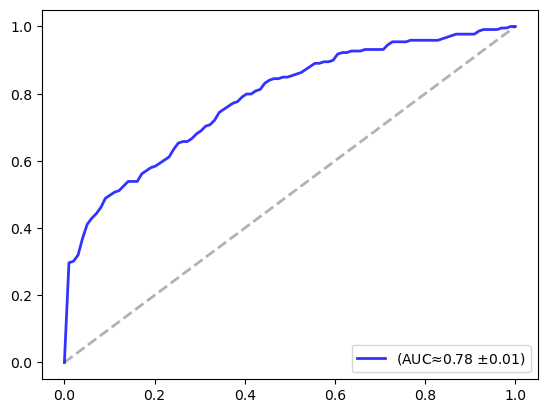

In [91]:
#ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',alpha=0.3)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'(AUC≈%0.2f $\pm$%0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.legend(loc="lower right")